In [1]:
import random 
from env import StaticGridEnv
import numpy as np
import matplotlib.pyplot as plt
import json
import pandas as pd

#seeding for reproducibility
random.seed(42)

#environment variables
numActions = 4
validActions = [0, 1, 2, 3]
numStates = 10*10 #10x10 grid

#setting up Q-table


pygame 2.6.1 (SDL 2.30.7, Python 3.12.2)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
def plotCumulativeReward(cumulativeReward):
    plt.plot(cumulativeReward)
    plt.xlabel('Episodes')
    plt.ylabel('Cumulative Reward')
    plt.title('Cumulative Reward vs Episodes')
    plt.show()

def calculateSuccessRate(numSuccess, numEpisodes):
    successRate = (numSuccess / numEpisodes) * 100
    print('Success Rate: ', successRate, '%')
    return successRate
    
    
def calculateAverageLearningSpeed(stepsPerEpisode):
    averageLearningSpeed = 1 / np.mean(stepsPerEpisode)
    print('Average Learning Speed: ', averageLearningSpeed)
    return averageLearningSpeed

def calculateAverageRewardPerEpisode(totalRewardsPerEpisode):
    averageRewardPerEpisode = np.mean(totalRewardsPerEpisode)
    print('Average Reward Per Episode: ', averageRewardPerEpisode)
    return averageRewardPerEpisode

Episode:  0
Episode:  1
Episode:  2
Episode:  3
Episode:  4
Episode:  5
Episode:  6
Episode:  7
Episode:  8
Episode:  9
Episode:  10
Episode:  11
Episode:  12
Episode:  13
Episode:  14
Episode:  15
Episode:  16
Episode:  17
Episode:  18
Episode:  19
Episode:  20
Episode:  21
Episode:  22
Episode:  23
Episode:  24
Episode:  25
Episode:  26
Episode:  27
Episode:  28
Episode:  29
Episode:  30
Episode:  31
Episode:  32
Episode:  33
Episode:  34
Episode:  35
Episode:  36
Episode:  37
Episode:  38
Episode:  39
Episode:  40
Episode:  41
Episode:  42
Episode:  43
Episode:  44
Episode:  45
Episode:  46
Episode:  47
Episode:  48
Episode:  49
Episode:  50
Episode:  51
Episode:  52
Episode:  53
Episode:  54
Episode:  55
Episode:  56
Episode:  57
Episode:  58
Episode:  59
Episode:  60
Episode:  61
Episode:  62
Episode:  63
Episode:  64
Episode:  65
Episode:  66
Episode:  67
Episode:  68
Episode:  69
Episode:  70
Episode:  71
Episode:  72
Episode:  73
Episode:  74
Episode:  75
Episode:  76
Episode: 

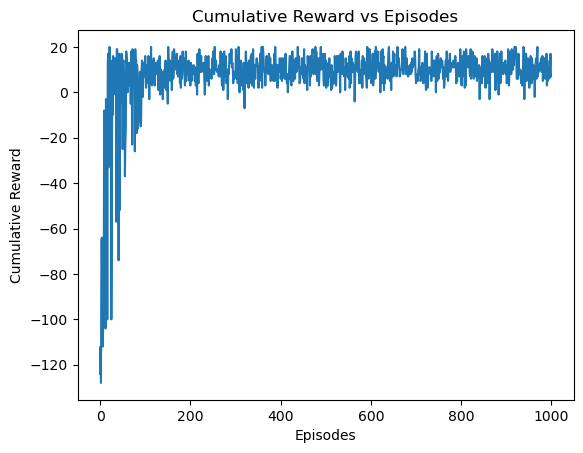

Total Rewards per Episode: [-124, -112, -128, -65, -64, -100, -112, -100, -100, -8, -55, -36, -104, -3, -10, -7, -100, 13, 17, -33, -18, 20, 14, -26, 14, -100, -55, 11, -10, 16, -1, 2, 4, 13, 15, 8, -57, 19, 19, -13, 15, -74, 17, -52, 12, -5, 9, 17, 17, 16, -25, 13, 14, 8, 8, -37, -23, -16, 18, 15, 11, 0, 6, 13, 10, 8, 3, 13, -5, 18, 17, -23, 19, 12, 7, 15, 13, -26, 19, 11, 14, -18, 12, 8, -16, 4, 3, -13, 9, 9, -15, -12, 10, 14, 10, -2, 13, 10, 7, 8, 16, 8, 2, 12, 4, 10, 7, 16, 9, -3, 10, 10, 11, 20, 4, 3, 13, 11, 13, 15, 5, 3, 13, 13, 8, 11, 10, 10, 14, 1, 7, 11, 16, -1, 0, 10, 6, 9, 4, -3, 9, 6, 2, 10, 7, 14, 7, 1, 8, 4, -5, 20, 13, 12, 9, 14, 5, 9, 10, 1, 14, 18, 6, 8, 19, 15, 10, 11, 14, 11, 17, 8, 9, 7, 14, 13, 11, 4, 16, 2, 12, 6, 8, 18, 12, 13, 15, 8, 3, 6, 18, 5, 13, 12, 8, 9, 14, 7, 5, 13, 3, 13, 12, 5, 11, 10, 8, 12, 11, 10, 5, 11, 3, 5, 5, -1, 17, 6, 4, 8, 19, 11, 9, 12, 16, 9, 10, 11, 10, 13, 12, 5, -1, 4, 16, 7, 15, 7, 5, 6, 16, 3, 10, 7, 10, 10, 7, 6, 10, 15, 11, 18, 8, 8

In [3]:
# Initialize the environment
env = StaticGridEnv(42)


q = np.zeros((numStates, numActions))

# Params
#epsilon = 1.0
epsilon = 0.1
maxEpsilon = 1.0
minEpsilon = 0.01
decay_rate = 0.01

alpha = 0.8    # Learning rate
gamma = 0.95   # Discount factor
num_episodes = 1000
max_steps_per_episode = 100


# Metrics
total_rewards_per_episode = []
steps_per_episode = []
successful_episodes = 0

for episode in range(num_episodes):
    print(f"Episode: ", episode)
    twodimState = env.reset()
    state = twodimState[0]*10 + twodimState[1]
    done = False
    total_rewards = 0
    steps = 0
    action = 0
    
    
    for step in range(max_steps_per_episode):
        # Choose an action (epsilon-greedy policy)
        if random.uniform(0, 1) > epsilon: # Exploit
            #print(q[state, :])
            #print(np.argmax(q[state, :]))
            action =  np.argmax(q[state, :])
        else: # Explore
            action = random.choice(validActions)

        # Take the action
        next_stateTwoDim, reward, done, _ = env.step(action)
        nextState = next_stateTwoDim[0]*10 + next_stateTwoDim[1]

        # Update Q-table
        q[state, action] = q[state, action] + alpha * (reward + gamma * np.max(q[nextState, :]) - q[state, action])

        # Update metrics
        total_rewards += reward
        steps += 1

        # Render the environment (optional)
        #env.render(episode=episode, learning_type="Q-learning")

        # Transition to the next state
        twodimState = next_stateTwoDim
        state = nextState

        if done:
            successful_episodes += 1
            break

    # Track metrics
    total_rewards_per_episode.append(total_rewards)
    steps_per_episode.append(steps)

    # Decay epsilon
    #epsilon = minEpsilon + (maxEpsilon - minEpsilon) * np.exp(-decay_rate*episode)
    



# Close the environment
#env.close()

# Calculate metrics
successRate = calculateSuccessRate(successful_episodes, num_episodes)
averageRewardPerEpisode = calculateAverageRewardPerEpisode(total_rewards_per_episode)
averageLearningSpeed = calculateAverageLearningSpeed(steps_per_episode)

# Save metrics to a JSON file
metrics = {
    "Success Rate": successRate,
    "Average Reward per Episode": averageRewardPerEpisode,
    "Average Learning Speed": averageLearningSpeed,
}

with open("metricsQ.json", "w") as f:
    json.dump(metrics, f, indent=4)

# Plot cumulative reward
plotCumulativeReward(total_rewards_per_episode)

# Print metrics
print(f"Total Rewards per Episode: {total_rewards_per_episode}")
print(f"Steps per Episode: {steps_per_episode}")
print(f"Number of Successful Episodes: {successful_episodes}")

Episode:  0
Episode:  1
Episode:  2
Episode:  3
Episode:  4
Episode:  5
Episode:  6
Episode:  7
Episode:  8
Episode:  9
Episode:  10
Episode:  11
Episode:  12
Episode:  13
Episode:  14
Episode:  15
Episode:  16
Episode:  17
Episode:  18
Episode:  19
Episode:  20
Episode:  21
Episode:  22
Episode:  23
Episode:  24
Episode:  25
Episode:  26
Episode:  27
Episode:  28
Episode:  29
Episode:  30
Episode:  31
Episode:  32
Episode:  33
Episode:  34
Episode:  35
Episode:  36
Episode:  37
Episode:  38
Episode:  39
Episode:  40
Episode:  41
Episode:  42
Episode:  43
Episode:  44
Episode:  45
Episode:  46
Episode:  47
Episode:  48
Episode:  49
Episode:  50
Episode:  51
Episode:  52
Episode:  53
Episode:  54
Episode:  55
Episode:  56
Episode:  57
Episode:  58
Episode:  59
Episode:  60
Episode:  61
Episode:  62
Episode:  63
Episode:  64
Episode:  65
Episode:  66
Episode:  67
Episode:  68
Episode:  69
Episode:  70
Episode:  71
Episode:  72
Episode:  73
Episode:  74
Episode:  75
Episode:  76
Episode: 

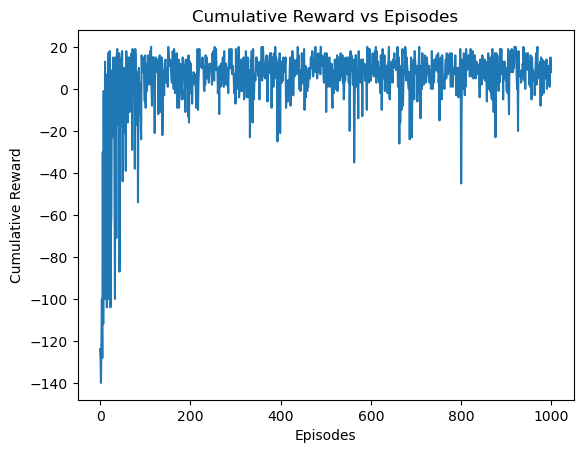

Total Rewards per Episode: [-124, -128, -140, -120, -100, -128, -30, -112, -1, -100, -100, 13, -100, 7, -12, -104, -79, -21, 17, -100, -100, 18, 12, -104, -67, -60, -6, 9, -23, 15, 3, 4, -49, -100, 15, 14, -71, 16, 19, -17, 15, 2, 17, -87, 10, -18, 14, 14, 17, 18, -44, 4, 3, 10, 10, -21, -7, -39, 18, 13, 3, -16, 8, 15, 3, -11, 9, 15, 9, 16, 17, -29, 19, 14, -3, 15, 10, -38, 19, 15, -2, -17, 7, 8, -54, -1, 10, -12, 3, 1, -15, -24, 16, 12, 12, 8, 15, 10, 3, -6, 16, -9, 8, 12, -1, 12, 10, 16, 11, 2, 11, 18, 11, 20, 0, -8, 15, 11, 1, 15, 10, -21, 13, 15, 8, 8, 9, 8, 14, -12, 7, 11, 16, -11, 2, 6, 10, 15, -22, -13, 9, 6, -3, 12, 13, 14, 7, 3, 10, 9, 1, 20, 17, 12, 11, 14, 13, 9, 6, 3, 14, 18, 13, 0, 19, 15, -2, 11, 9, 11, 17, -9, 13, 1, 14, -9, 11, 8, 12, -2, 11, -5, 10, 15, 13, 11, 11, -5, 0, -11, 14, 3, 1, 12, 8, -13, 16, -16, 5, 13, 0, 12, -2, 3, -7, 6, 3, 8, 7, 4, 2, 7, 1, -9, 3, -9, 19, -10, 4, 9, 19, 11, 11, 11, 11, 10, 12, 15, 11, 11, 1, -1, 7, 2, 16, 5, 15, 9, 5, 6, 10, 3, 12, 11, 1

In [4]:


envS = StaticGridEnv(42)


sarsa = np.zeros((numStates, numActions))


# Params
#epsilon = 1.0
epsilonS = 0.1
maxEpsilonS = 1.0
minEpsilonS = 0.01
decay_rateS = 0.01

alphaS = 0.8    # Learning rate
gammaS = 0.95   # Discount factor
num_episodesS = 1000
max_steps_per_episodeS = 100


# Metrics
total_rewards_per_episodeS = []
steps_per_episodeS = []
successful_episodesS = 0

for episodeS in range(num_episodesS):
    print(f"Episode: ", episodeS)
    twodimStateS = envS.reset()
    stateS = twodimStateS[0]*10 + twodimStateS[1]
    doneS = False
    total_rewardsS = 0
    stepsS = 0
    actionS = 0
    nextActionS = 0
    
    
    # Choose an action (epsilon-greedy policy)
    if random.uniform(0, 1) > epsilonS: # Exploit
        #print(q[state, :])
        #print(np.argmax(q[state, :]))
        actionS =  np.argmax(sarsa[stateS, :])
    else: # Explore
        actionS = random.choice(validActions)
    
    for stepS in range(max_steps_per_episodeS):
        

        # Take the action
        next_stateTwoDimS, rewardS, doneS, _ = envS.step(actionS)
        nextStateS = next_stateTwoDimS[0]*10 + next_stateTwoDimS[1]
        
        if random.uniform(0, 1) > epsilonS: # Exploit
            nextActionS =  np.argmax(sarsa[nextStateS, :])
        else: # Explore
            nextActionS = random.choice(validActions)

        # Update Q-table
        sarsa[stateS, actionS] = sarsa[stateS, actionS] + alphaS * (rewardS + gammaS * sarsa[nextStateS, nextActionS] - sarsa[stateS, actionS])

        # Update metrics
        total_rewardsS += rewardS
        stepsS += 1

        # Render the environment (optional)
        #env.render(episode=episode, learning_type="Q-learning")

        # Transition to the next state
        twodimStateS = next_stateTwoDimS
        stateS = nextStateS
        actionS = nextActionS

        if doneS:
            successful_episodesS += 1
            break

    # Track metrics
    total_rewards_per_episodeS.append(total_rewardsS)
    steps_per_episodeS.append(stepsS)

    # Decay epsilon
    #epsilon = minEpsilon + (maxEpsilon - minEpsilon) * np.exp(-decay_rate*episode)
    



# Close the environment
#envS.close()

# Calculate metrics
successRateS = calculateSuccessRate(successful_episodesS, num_episodesS)
averageRewardPerEpisodeS = calculateAverageRewardPerEpisode(total_rewards_per_episodeS)
averageLearningSpeedS = calculateAverageLearningSpeed(steps_per_episodeS)

# Save metrics to a JSON file
metricsS = {
    "Success Rate": successRateS,
    "Average Reward per Episode": averageRewardPerEpisodeS,
    "Average Learning Speed": averageLearningSpeedS,
}

with open("metricsS.json", "w") as fS:
    json.dump(metricsS, fS, indent=4)
    
# Plot cumulative reward
plotCumulativeReward(total_rewards_per_episodeS)

# Print metrics
print(f"Total Rewards per Episode: {total_rewards_per_episodeS}")
print(f"Steps per Episode: {steps_per_episodeS}")
print(f"Number of Successful Episodes: {successful_episodesS}")



In [5]:
def provideTeacherAdvice(teacherQTable, currentState, availability, accuracy):
    correctAction = np.argmax(teacherQTable[currentState, :])
    otherActions = [0, 1, 2, 3]
    otherActions.remove(correctAction)
    possibleAction = random.choice(otherActions)
    if random.uniform(0, 1) < availability:
        if random.uniform(0, 1) < accuracy:
            return correctAction
        else:
            return possibleAction
    else:
        return -1

In [6]:


availability = [0.2, 0.4, 0.6, 0.8, 1.0]
accuracy = [0.2, 0.4, 0.6, 0.8, 1.0]

iterationMetrics = np.zeros((len(availability), len(accuracy), 3))

studentQ = np.zeros((numStates, numActions))

dataFrame = pd.DataFrame(columns=['Availability', 'Accuracy', 'Avg Reward', 'Success Rate (%)', 'Avg Learning Speed'])


def studentQTraining(a, b):
    successful_episodes = 0
    total_rewards_per_episode = []
    steps_per_episode = []
    print("Availability: ", a)
    print("Accuracy: ", b)
    for episode in range(num_episodes):
        print(f"Episode: ", episode)
        twodimState = env.reset()
        state = twodimState[0]*10 + twodimState[1]
        done = False
        total_rewards = 0
        steps = 0
        action = 0
            
        for step in range(max_steps_per_episode):
            # Choose an action (epsilon-greedy policy)
            action = provideTeacherAdvice(q, state, a, b)
            if action == -1:
                if random.uniform(0, 1) > epsilon: # Exploit
                    #print(q[state, :])
                    #print(np.argmax(q[state, :]))
                    action =  np.argmax(studentQ[state, :])
                else: # Explore
                    action = random.choice(validActions)
                
            # Take the action
            next_stateTwoDim, reward, done, _ = env.step(action)
            nextState = next_stateTwoDim[0]*10 + next_stateTwoDim[1]

            # Update Q-table
            studentQ[state, action] = studentQ[state, action] + alpha * (reward + gamma * np.max(studentQ[nextState, :]) - studentQ[state, action])

            # Update metrics
            total_rewards += reward
            steps += 1

            # Render the environment (optional)
            #env.render(episode=episode, learning_type="Q-learning")

            # Transition to the next state
            twodimState = next_stateTwoDim
            state = nextState

            if done:
                successful_episodes += 1
                break

            # Track metrics
        total_rewards_per_episode.append(total_rewards)
        steps_per_episode.append(steps)

        # Decay epsilon
        #epsilon
    successRate = calculateSuccessRate(successful_episodes, num_episodes)
    averageRewardPerEpisode = calculateAverageRewardPerEpisode(total_rewards_per_episode)
    averageLearningSpeed = calculateAverageLearningSpeed(steps_per_episode)
    iterationMetrics[availability.index(a), accuracy.index(b), 0] = successRate
    iterationMetrics[availability.index(a), accuracy.index(b), 1] = averageRewardPerEpisode
    iterationMetrics[availability.index(a), accuracy.index(b), 2] = averageLearningSpeed
    
    
for a in availability:
    for b in accuracy:
        studentQTraining(a, b)
       
            

Availability:  0.2
Accuracy:  0.2
Episode:  0
Episode:  1
Episode:  2
Episode:  3
Episode:  4
Episode:  5
Episode:  6
Episode:  7
Episode:  8
Episode:  9
Episode:  10
Episode:  11
Episode:  12
Episode:  13
Episode:  14
Episode:  15
Episode:  16
Episode:  17
Episode:  18
Episode:  19
Episode:  20
Episode:  21
Episode:  22
Episode:  23
Episode:  24
Episode:  25
Episode:  26
Episode:  27
Episode:  28
Episode:  29
Episode:  30
Episode:  31
Episode:  32
Episode:  33
Episode:  34
Episode:  35
Episode:  36
Episode:  37
Episode:  38
Episode:  39
Episode:  40
Episode:  41
Episode:  42
Episode:  43
Episode:  44
Episode:  45
Episode:  46
Episode:  47
Episode:  48
Episode:  49
Episode:  50
Episode:  51
Episode:  52
Episode:  53
Episode:  54
Episode:  55
Episode:  56
Episode:  57
Episode:  58
Episode:  59
Episode:  60
Episode:  61
Episode:  62
Episode:  63
Episode:  64
Episode:  65
Episode:  66
Episode:  67
Episode:  68
Episode:  69
Episode:  70
Episode:  71
Episode:  72
Episode:  73
Episode:  74
E